# [LAB 11] 3. 연습문제
penguins 데이터셋은 이터셋은 남극 Palmer 군도에서 채집된 펭귄들의 신체 특성을 포함하고 있으며, 생태학적 패턴을 이해하는 데 널리 활용된다.

이 데이터셋을 활용하여 펭귄의 주요 연속형 신체 측정값 간의 상관구조를 탐색하고, 부리 특성,지느러미 및 체중 등 생물학적 특성 간의 관계를 파악하시오

#### 1. 패키지 가져오기

In [1]:
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr


# 파이썬 기본 패키지
from itertools import combinations

#### 2. 그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

penguins 데이터셋은 이터셋은 남극 Palmer 군도에서 채집된 펭귄들의 신체 특성을 포함하고 있으며, 생태학적 패턴을 이해하는 데 널리 활용된다.

이 데이터셋을 활용하여 펭귄의 주요 연속형 신체 측정값 간의 상관구조를 탐색하고, 부리 특성,지느러미 및 체중 등 생물학적 특성 간의 관계를 파악하시오

<데이터 가져오기>

In [3]:
origin = load_data('penguins')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 타입확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/kaggle/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: https://www.kaggle.com/datasets/larsen0966/penguins)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별


===== 데이터 크기 확인 =====
데이터셋 크기: (334, 7)
열 개수: 7
행 개수: 334

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   bill_length_mm     334 non-null    float64
 3   bill_depth_mm      334 non-null    float64
 4   flipper_length_mm  334 non-null    int64  
 5   body_mass_g        334 non-null    int64  
 6   sex                333 non-null    object 


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


<데이터 전처리>

In [4]:
df = origin.filter(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181,3750
1,39.5,17.4,186,3800
2,40.3,18.0,195,3250
3,36.7,19.3,193,3450
4,39.3,20.6,190,3650


<상관도 시각화>

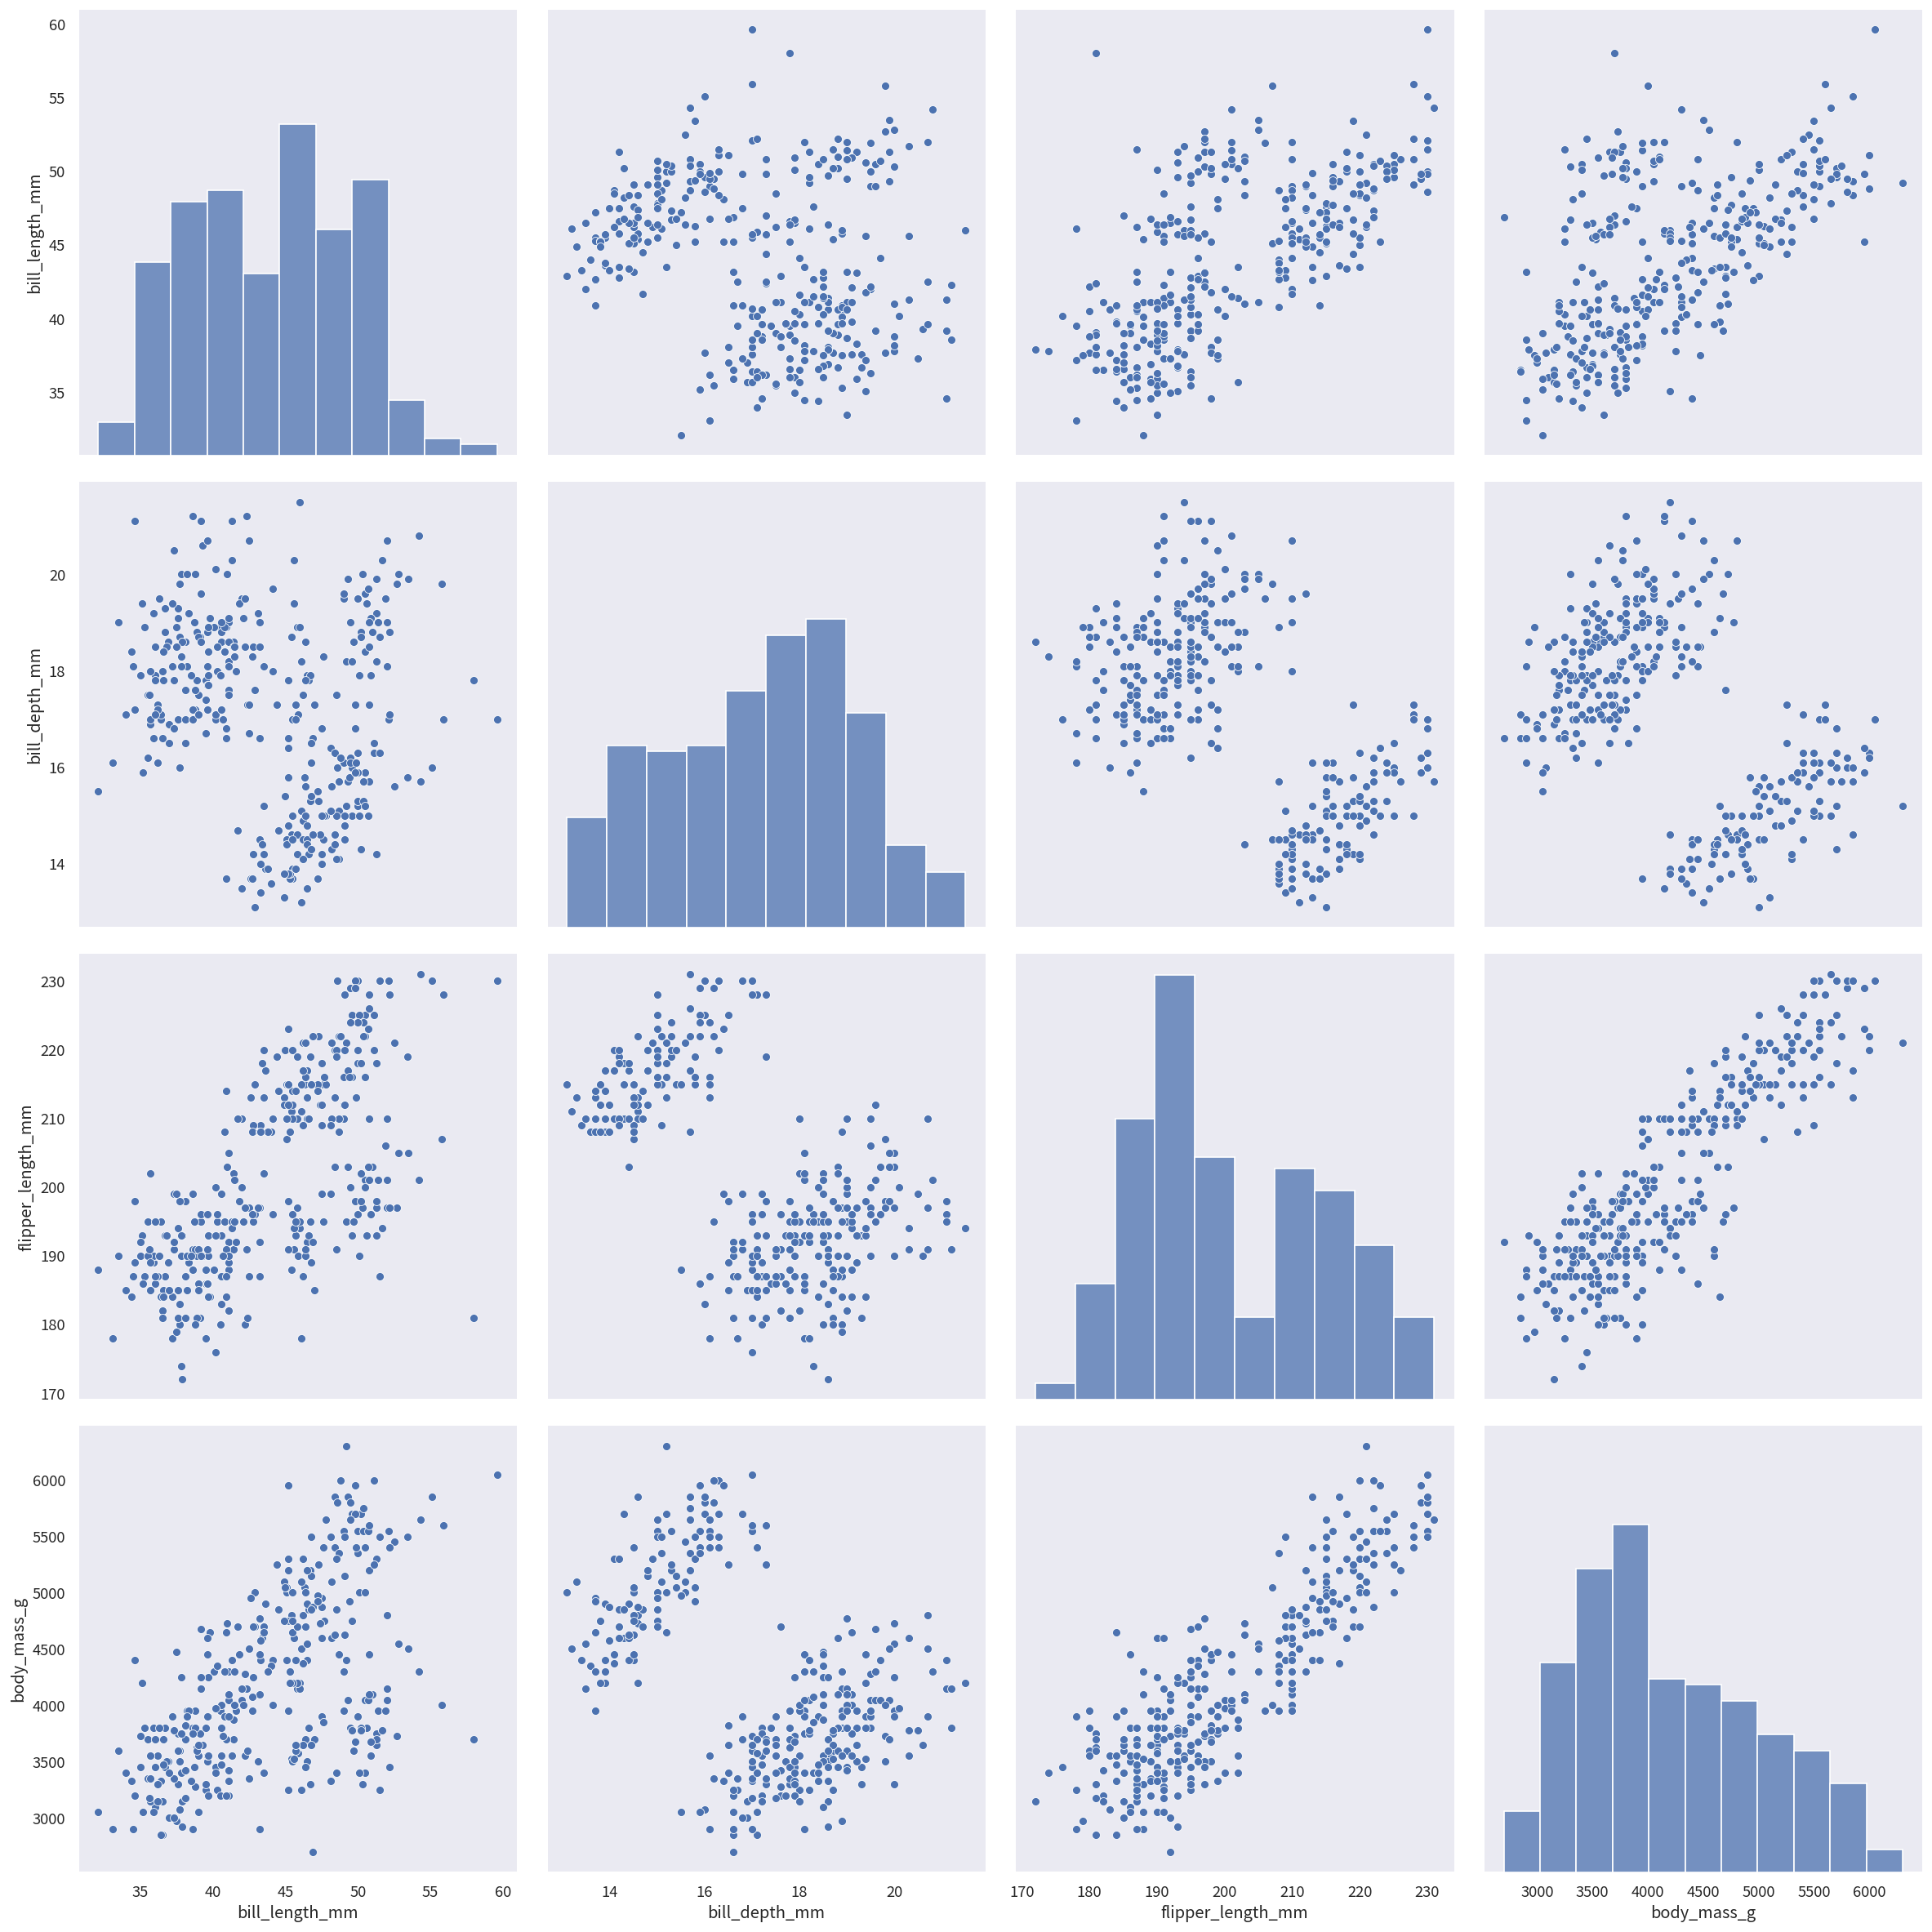

In [5]:
width_px = 2400
height_px = 2400
figsize = (width_px / my_dpi, height_px / my_dpi)


g = sb.pairplot(df,diag_kind = 'hist')
g.fig.set_size_inches(figsize)
g.fig.set_dpi(my_dpi)
plt.tight_layout()
plt.show()
plt.close()

<이상치 처리>

In [6]:
skew_outlier = {}
for col in df.columns:
    temp = df[col].dropna()
    skew_original = temp.skew()
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    skew_outlier[col] = {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z|>3)': outlier_count
    }

skew_outlier_df = DataFrame(skew_outlier).T
skew_outlier_df

,original_skew,log_skew,outliers(|z|>3)
bill_length_mm,0.050796,-0.765943,0.0
bill_depth_mm,-0.155316,-0.732511,0.0
flipper_length_mm,0.359305,-0.791583,0.0
body_mass_g,0.471045,-2.611903,0.0


In [7]:

# --- 1단계: 변수별 분포 및 이상치 점검 ---
skew_outlier = {}
for col in df.columns:
    temp = df[col].dropna()
    skew_original = temp.skew()
    z_scores = zscore(temp)
    # 절대값 3을 초과하는 경우를 이상치로 간주
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    # 로그 변환 후 왜도 확인 (분포 개선 여부 확인용)
    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    skew_outlier[col] = {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z|>3)': outlier_count
    }

skew_outlier_df = DataFrame(skew_outlier).T
# skew_outlier_df 출력은 생략

# --- 2단계: 모든 변수 쌍(Pair)에 대한 상관분석 루프 (Image 1 & 3) ---
rows = []

# 모든 변수 조합(Pair)을 순회 (예: A와 B, A와 C, B와 C ...)
for a, b in combinations(df.columns, 2):
    x = df[a]
    y = df[b]

    # [1] 선형성 확인 (Ramsey RESET Test)
    # 상수항 추가 (회귀분석을 위해 필수)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    # 주의: linear_reset 함수는 statsmodels 버전에 따라 사용법이 다를 수 있음
    reset = linear_reset(model, power=2, use_f=True)
    linearity_ok = reset.pvalue > 0.05  # p > 0.05면 선형성 만족(귀무가설 채택)

    # [2] 이상치 존재 여부 확인 (|z| > 3 기준)
    # 위에서 만든 skew_outlier_df 표를 참조함
    a_flag = skew_outlier_df.loc[a, 'outliers(|z|>3)'] > 0
    b_flag = skew_outlier_df.loc[b, 'outliers(|z|>3)'] > 0
    outlier_flag = a_flag or b_flag  # 둘 중 하나라도 이상치가 있으면 True

    # [3] 상관계수 방법 선택 (의사결정 로직)
    # 선형성을 만족하고(AND) 이상치가 없을 때만 -> 피어슨(Pearson)
    if linearity_ok and not outlier_flag:
        chosen = 'pearson'
        corr, pval = pearsonr(x, y)
    # 선형성이 없거나(OR) 이상치가 있으면 -> 스피어만(Spearman, 비모수)
    else:
        chosen = 'spearman'
        corr, pval = spearmanr(x, y)

    # [4] 유의성 판단 (p <= 0.05)
    significant = pval <= 0.05

    # [5] 상관 강도 계산 (절대값 기준)
    abs_r = abs(corr)
    if abs_r >= 0.80:
        strength = "Very strong"
    elif abs_r >= 0.60:
        strength = "Strong"
    elif abs_r >= 0.40:
        strength = "Medium"
    elif abs_r >= 0.20:
        strength = "Weak"
    else:
        strength = "Very weak"

    # [6] 결과 저장 (행 추가) - Image 3 내용
    rows.append({
        "var_a": a,
        "var_b": b,
        "linearity": linearity_ok,
        "outlier_flag": outlier_flag,
        "chosen": chosen,
        "corr": corr,
        "pval": pval,
        "significant": significant,
        "strength": strength
    })

# 최종 결과 데이터프레임 생성
summary_df = DataFrame(rows)
summary_df

,var_a,var_b,linearity,outlier_flag,chosen,corr,pval,significant,strength
0,bill_length_mm,bill_depth_mm,False,False,spearman,-0.216209,6.782928e-05,True,Weak
1,bill_length_mm,flipper_length_mm,False,False,spearman,0.671510,3.901395e-45,True,Strong
2,bill_length_mm,body_mass_g,False,False,spearman,0.579194,2.591284e-31,True,Medium
3,bill_depth_mm,flipper_length_mm,False,False,spearman,-0.518341,2.317525e-24,True,Medium
4,bill_depth_mm,body_mass_g,False,False,spearman,-0.430729,1.609964e-16,True,Medium
5,flipper_length_mm,body_mass_g,False,False,spearman,0.841582,8.031883e-91,True,Very strong


<상관행렬 생성>

In [8]:
# 1) 등장하는 모든 변수 목록 추출
vars = sorted(set(summary_df['var_a']).union(summary_df['var_b']))

# 2) 빈 상관행렬 생성 (NaN으로 초기화)
corr_matrix = DataFrame(np.nan, index=vars, columns=vars)

# 3) summary_df 내용을 반영하여 대칭 행렬 채우기
for _, row in summary_df.iterrows():
    a, b, r = row['var_a'], row['var_b'], row['corr']
    corr_matrix.loc[a, b] = r
    corr_matrix.loc[b, a] = r   # 대칭

# 4) 대각선(diagonal)을 1로 설정
np.fill_diagonal(corr_matrix.values, 1)

corr_matrix


,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
bill_depth_mm,1.000000,-0.216209,-0.430729,-0.518341
bill_length_mm,-0.216209,1.000000,0.579194,0.671510
body_mass_g,-0.430729,0.579194,1.000000,0.841582
flipper_length_mm,-0.518341,0.671510,0.841582,1.000000


<상관행렬 시각화>

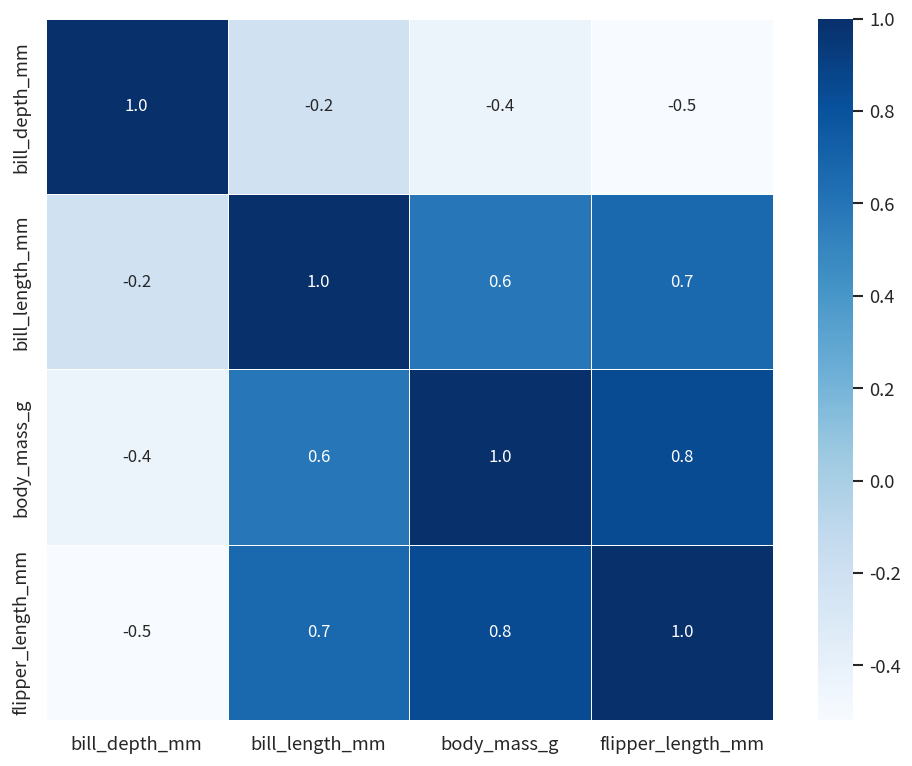

In [9]:
# 1) 그래프 초기화
width_px  = 1000                     # 그래프 가로 크기
height_px = 800                      # 그래프 세로 크기
rows = 1                             # 그래프 행 수
cols = 1                             # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) heatmap 그리기
sb.heatmap(data=corr_matrix, annot=True, fmt="0.1f", linewidth=0.5,
           cmap="Blues", annot_kws={"size": 10})

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


🐧 펭귄 데이터 상관분석 보고서

대상 변수:
bill_depth_mm, bill_length_mm, body_mass_g, flipper_length_mm

📌 1. bill_depth_mm 관련 상관

bill_depth_mm ↔ bill_length_mm
r = -0.216 → 약한 음의 상관
→ 부리가 깊을수록 길이는 약간 짧아지는 경향이 있으나 상관은 매우 약함.

bill_depth_mm ↔ body_mass_g
r = -0.431 → 중간 음의 상관
→ 부리 깊이가 깊을수록 체중이 줄어드는 경향이 중간 정도로 존재.

bill_depth_mm ↔ flipper_length_mm
r = -0.518 → 중간 음의 상관
→ 부리 깊이가 깊을수록 지느러미 길이가 짧아지는 경향이 비교적 뚜렷함.

📌 2. bill_length_mm 관련 상관

bill_length_mm ↔ body_mass_g
r = 0.579 → 중간 양의 상관
→ 부리가 길수록 체중이 증가하는 경향이 뚜렷하게 존재.

bill_length_mm ↔ flipper_length_mm
r = 0.671 → 강한 양의 상관(중~강한 경계)
→ 부리 길이가 길수록 지느러미 길이도 길어지는 경향이 강함.

📌 3. body_mass_g 관련 상관

body_mass_g ↔ flipper_length_mm
r = 0.841 → 매우 강한 양의 상관
→ 체중이 증가할수록 지느러미 길이가 매우 강하게 증가, 생물학적으로도 자연스러운 관계.

📌 4. 종합 논의

체중(body_mass_g) 과 flipper_length_mm 사이의 상관이 매우 강하게 나타남 (r = 0.841).
이는 체형이 큰 개체일수록 지느러미도 더 크다는 해부학적 특성과 일치한다.

bill_length_mm은 체중(body_mass_g)과 flipper_length_mm 모두와 강~중간 수준의 양의 상관을 보임.
→ 부리 길이가 큰 개체는 전반적으로 체형이 크다는 뜻일 수 있음.

bill_depth_mm은 모든 변수들과 음의 상관을 보임.
→ 부리가 깊을수록 크기(길이·체중·지느러미 길이)가 큰 개체와는 반대되는 특성을 가진 개체일 가능성이 있음.

전체적으로 볼 때,
✔ 체형 관련 변수(body_mass_g, flipper_length_mm, bill_length_mm)끼리는 강한 양의 상관 구조를 가지며
✔ bill_depth_mm은 독립적이거나 반대되는 패턴을 보이는 특성이 있다.

📌 결론

이 상관행렬은 펭귄 개체의 신체적 특성 간 유기적인 관계를 잘 보여주며,
특히 체중 및 깃폭(지느러미 길이)은 매우 밀접한 구조를 가지고 있어
예측 모델이나 분류 모델에서 중요한 특징 변수로 활용 가능하다.